In [224]:
# Import necessary packages

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analaysis

In [225]:
# Load the dataset
income_attributes_data = pd.read_csv("income_evaluation.csv")
print("Data size:", income_attributes_data.shape)
display(income_attributes_data.head())

Data size: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [226]:
# Data Description
display(income_attributes_data.describe())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [227]:
# Data Summary
print(income_attributes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [228]:
income_attributes_data.isin([' ?']).sum(axis=0)

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

Observation:


*   In most instances where the work class is absent, the occupation field is also empty.



In [229]:
# Drop the missing value rows
income_attributes_data.replace(" ?", pd.NA, inplace=True)
income_attributes_data.dropna(inplace=True)

In [230]:
income_attributes_data.shape

(30162, 15)

In [231]:
income_attributes_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [232]:
# Strip whitespace from column names
income_attributes_data.columns = [column.strip() for column in income_attributes_data.columns]
income_attributes_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [233]:
# Strip and lower all values in the dataset
income_attributes_data = income_attributes_data.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [234]:
# Column "education" and "education-num" represents the same information. Therefore, we will remove the "education" column
income_attributes_data.drop(columns=['education'], inplace=True)

In [235]:
# Transform work class column

def update_workclass(value):
    if '-' in value:
        if value.split('-')[1].startswith('gov'):
            return 'gov'
        elif value.startswith('self'):
          return 'self'
    return value

income_attributes_data['workclass'] = income_attributes_data['workclass'].apply(update_workclass)

In [236]:
# Mark capital gain and loss as 1 if non-zero, else mark as 0

income_attributes_data['capital_gain_indicator'] = income_attributes_data['capital-gain'].apply(lambda x: 1 if x != 0 else 0)
income_attributes_data['capital_loss_indicator'] = income_attributes_data['capital-loss'].apply(lambda x: 1 if x != 0 else 0)

income_attributes_data.drop(columns=['capital-gain', 'capital-loss'], inplace=True)

income_attributes_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_gain_indicator,capital_loss_indicator
0,39,gov,77516,13,never-married,adm-clerical,not-in-family,white,male,40,united-states,<=50k,1,0
1,50,self,83311,13,married-civ-spouse,exec-managerial,husband,white,male,13,united-states,<=50k,0,0
2,38,private,215646,9,divorced,handlers-cleaners,not-in-family,white,male,40,united-states,<=50k,0,0
3,53,private,234721,7,married-civ-spouse,handlers-cleaners,husband,black,male,40,united-states,<=50k,0,0
4,28,private,338409,13,married-civ-spouse,prof-specialty,wife,black,female,40,cuba,<=50k,0,0


In [237]:
# Age grouping
min_age = income_attributes_data["age"].min()
max_age = income_attributes_data["age"].max()
print("Min age:", min_age, "\nMax age:", max_age)

Min age: 17 
Max age: 90


In [238]:
bins = [0, 20, 30, 40, 50, 60, 100]  # Define age group boundaries
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']  # Define age group labels
labels_class = [i for i in range(len(labels))]

# Convert age column into groups
income_attributes_data['age_group'] = pd.cut(income_attributes_data['age'], bins=bins, labels=labels_class, right=False)

income_attributes_data.drop(columns=['age'], inplace=True)
income_attributes_data.head()

,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_gain_indicator,capital_loss_indicator,age_group
0,gov,77516,13,never-married,adm-clerical,not-in-family,white,male,40,united-states,<=50k,1,0,2
1,self,83311,13,married-civ-spouse,exec-managerial,husband,white,male,13,united-states,<=50k,0,0,4
2,private,215646,9,divorced,handlers-cleaners,not-in-family,white,male,40,united-states,<=50k,0,0,2
3,private,234721,7,married-civ-spouse,handlers-cleaners,husband,black,male,40,united-states,<=50k,0,0,4
4,private,338409,13,married-civ-spouse,prof-specialty,wife,black,female,40,cuba,<=50k,0,0,1


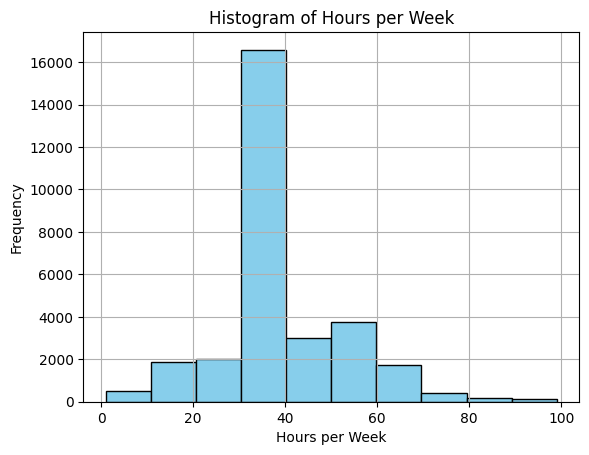

In [239]:
# Plot a histogram of hours-per-week
plt.hist(income_attributes_data['hours-per-week'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hours per Week')
plt.grid(True)
plt.show()

In [240]:
# Define categories based on working hours
def categorize_hours(hours):
    if hours < 30:
        return 'minimal'
    elif 30 <= hours <= 60:
        return 'standard'
    else:
        return 'extended'

income_attributes_data['work_hours_category'] = income_attributes_data['hours-per-week'].apply(categorize_hours)
income_attributes_data.drop(columns=['hours-per-week'], inplace=True)

income_attributes_data.head()

,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,native-country,income,capital_gain_indicator,capital_loss_indicator,age_group,work_hours_category
0,gov,77516,13,never-married,adm-clerical,not-in-family,white,male,united-states,<=50k,1,0,2,standard
1,self,83311,13,married-civ-spouse,exec-managerial,husband,white,male,united-states,<=50k,0,0,4,minimal
2,private,215646,9,divorced,handlers-cleaners,not-in-family,white,male,united-states,<=50k,0,0,2,standard
3,private,234721,7,married-civ-spouse,handlers-cleaners,husband,black,male,united-states,<=50k,0,0,4,standard
4,private,338409,13,married-civ-spouse,prof-specialty,wife,black,female,cuba,<=50k,0,0,1,standard


In [241]:
# Encoding string values to number

# from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
income_attributes_data = income_attributes_data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)
display(income_attributes_data.head(10))

,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,native-country,income,capital_gain_indicator,capital_loss_indicator,age_group,work_hours_category
0,0,77516,13,4,0,1,4,1,38,0,1,0,2,2
1,2,83311,13,2,3,0,4,1,38,0,0,0,4,1
2,1,215646,9,0,5,1,4,1,38,0,0,0,2,2
3,1,234721,7,2,5,0,2,1,38,0,0,0,4,2
4,1,338409,13,2,9,5,2,0,4,0,0,0,1,2
5,1,284582,14,2,3,5,4,0,38,0,0,0,2,2
6,1,160187,5,3,7,1,2,0,22,0,0,0,3,1
7,2,209642,9,2,3,0,4,1,38,1,0,0,4,2
8,1,45781,14,4,9,1,4,0,38,1,1,0,2,2
9,1,159449,13,2,3,0,4,1,38,1,1,0,3,2


In [242]:
income_attributes_data.columns

Index(['workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income',
       'capital_gain_indicator', 'capital_loss_indicator', 'age_group',
       'work_hours_category'],
      dtype='object')

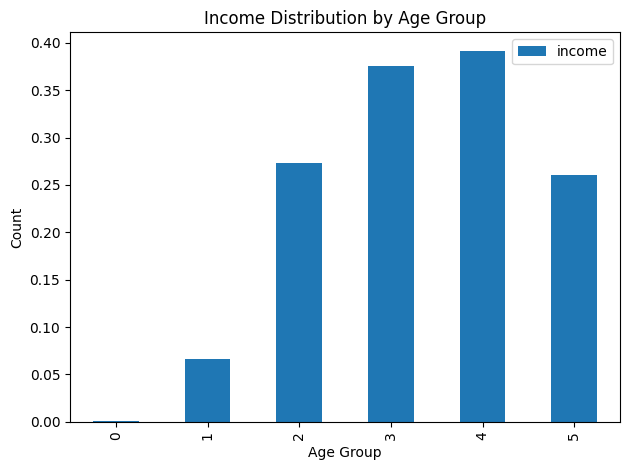

In [243]:
# Visualize count of adult that falls below 50K and above 50K income according to their age group

income_by_age_group = income_attributes_data.groupby(["age_group"])["income"].mean()
income_by_age_group.plot(kind='bar')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

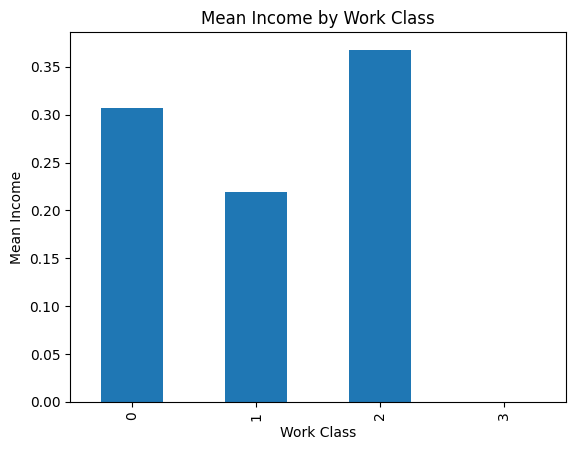

In [244]:
# Plot mean income according to workclass

income_by_workclass = income_attributes_data.groupby('workclass').income.mean()
income_by_workclass.plot(kind='bar')
plt.title('Mean Income by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Mean Income')
plt.show()

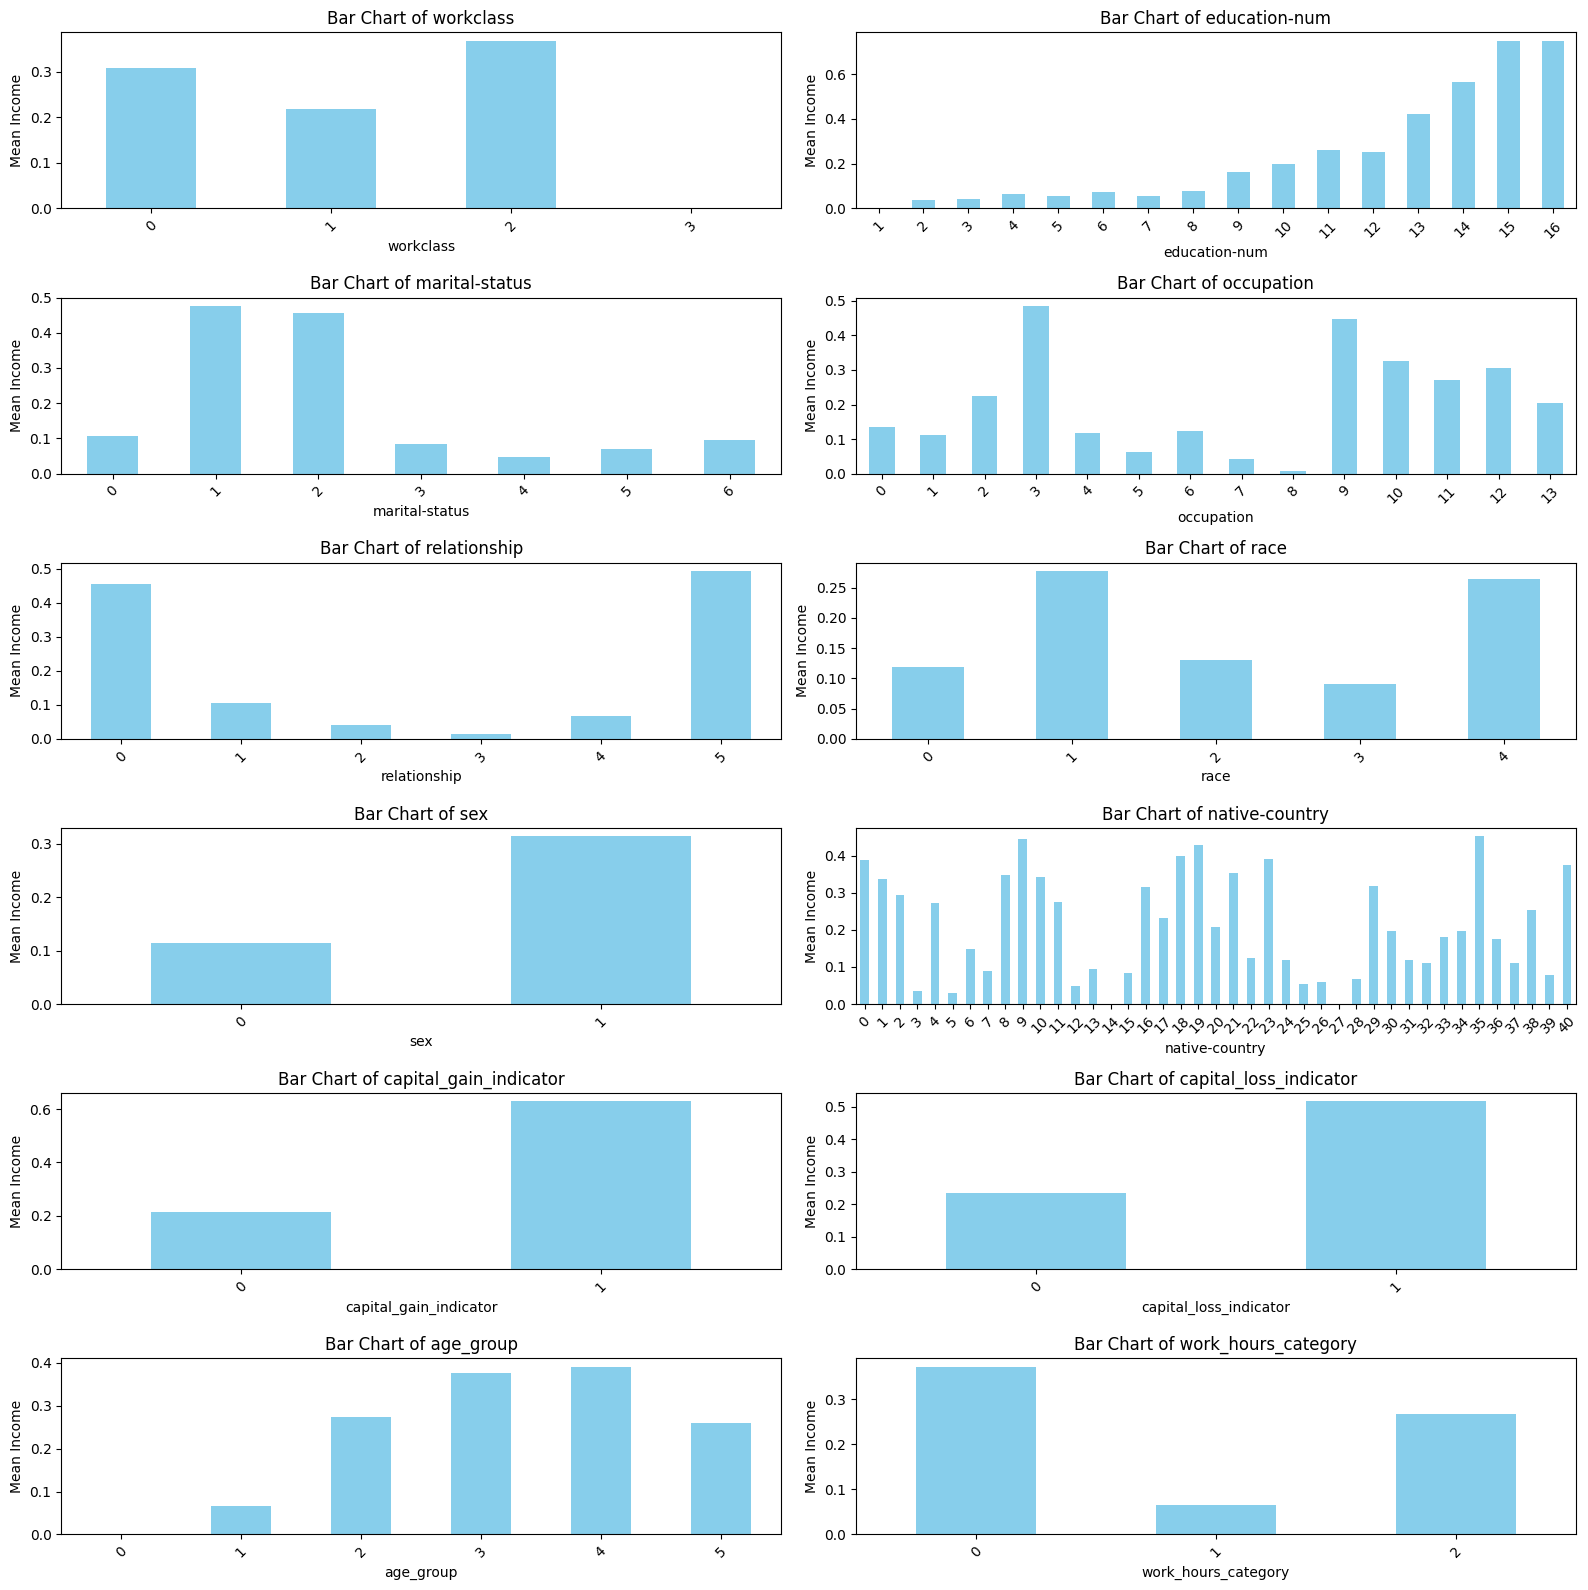

In [245]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bar_chart(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns - 1) // 2 + 1  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=min(2, num_columns), figsize=(16, 16))

    for i, column in enumerate(columns):
        row_idx = i // 2
        col_idx = i % 2

        income_by_attribute = income_attributes_data.groupby(column).income.mean()
        income_by_attribute.plot(kind='bar', color='skyblue', ax=axes[row_idx][col_idx])
        axes[row_idx][col_idx].set_title(f'Bar Chart of {column}')
        axes[row_idx][col_idx].set_xlabel(column)
        axes[row_idx][col_idx].set_ylabel('Mean Income')
        axes[row_idx][col_idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


columns_to_plot = [
    'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'capital_gain_indicator',
    'capital_loss_indicator', 'age_group', 'work_hours_category'
    ]
plot_bar_chart(income_attributes_data, columns_to_plot)


In [246]:
income_counts = income_attributes_data['income'].value_counts()

print("Number of data points for income 0:", income_counts[0])
print("Number of data points for income 1:", income_counts[1])


Number of data points for income 0: 22654
Number of data points for income 1: 7508


In [247]:
# Balancing Data

# from imblearn.over_sampling import RandomOverSampler

# # Oversampling
# oversampler = RandomOverSampler(sampling_strategy='minority')
# X_resampled, y_resampled = oversampler.fit_resample(income_attributes_data.drop(columns=['income']), income_attributes_data['income'])


<ipython-input-248-72408f600e4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = income_attributes_data.corr()


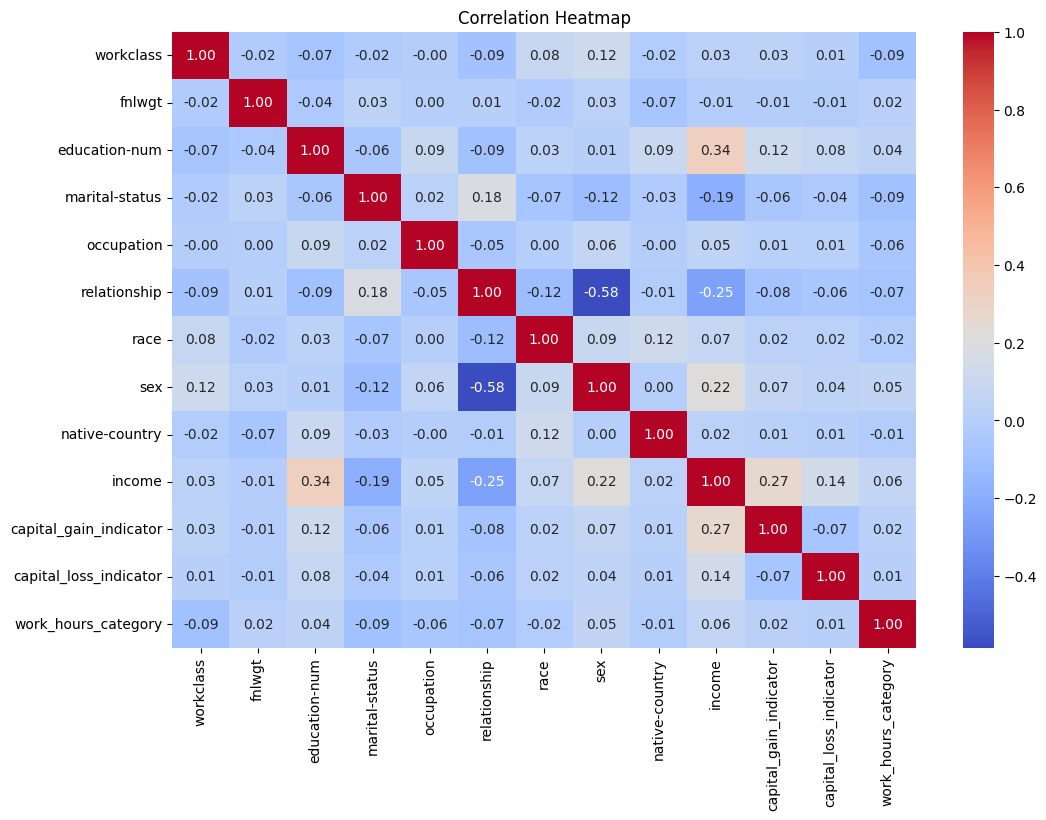

In [248]:
# Compute the correlation matrix
correlation_matrix = income_attributes_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()

In [249]:
# Dropping columns with low co-relation
income_attributes_data.drop(columns=["workclass", "fnlwgt", "occupation", "race", "native-country", "work_hours_category"], inplace=True)

In [292]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    income_attributes_data.drop(columns=['income']), income_attributes_data['income'], test_size=0.3, random_state=42
  )

# Initialize classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()

# Train models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC()

In [310]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    income_attributes_data.drop(columns=['income']), income_attributes_data['income'], test_size=0.3, random_state=42
)

# Initialize classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()

# Train models using cross-validation
def train_with_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_score = scores.mean()
    print(f"Mean accuracy with cross-validation: {mean_score}")
    return mean_score

# Train and evaluate models
models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Support Vector Machine': svm
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    train_with_cv(model, X_train, y_train)
    model.fit(X_train, y_train)



Training Logistic Regression...
Mean accuracy with cross-validation: 0.8116797178788915
Training Random Forest...
Mean accuracy with cross-validation: 0.8257945116370582
Training Gradient Boosting...
Mean accuracy with cross-validation: 0.8322831154155365
Training Support Vector Machine...
Mean accuracy with cross-validation: 0.8280203388697365


In [311]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    return report

# List of models
models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Support Vector Machine': svm
}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluation report for {model_name}:")
    print(evaluate_model(model, X_test, y_test))
    print("=" * 80)

Evaluation report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6767
           1       0.69      0.45      0.55      2282

    accuracy                           0.81      9049
   macro avg       0.76      0.69      0.71      9049
weighted avg       0.80      0.81      0.80      9049

Evaluation report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6767
           1       0.71      0.56      0.63      2282

    accuracy                           0.83      9049
   macro avg       0.79      0.74      0.76      9049
weighted avg       0.82      0.83      0.83      9049

Evaluation report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6767
           1       0.72      0.56      0.63      2282

    accuracy                           0.83      9049
   macr

In [312]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

print(evaluate_model(clf, X_test, y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6767
           1       0.71      0.56      0.62      2282

    accuracy                           0.83      9049
   macro avg       0.79      0.74      0.76      9049
weighted avg       0.82      0.83      0.82      9049



In [313]:
X_train.head()

,education-num,marital-status,relationship,sex,capital_gain_indicator,capital_loss_indicator,age_group
29253,9,2,0,1,0,0,2
14267,9,2,0,1,0,0,1
26021,13,2,5,0,0,0,2
24278,9,0,4,0,0,0,2
4225,9,5,1,1,0,0,1


In [314]:
feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: education-num        Importance: 0.3
Variable: relationship         Importance: 0.27
Variable: marital-status       Importance: 0.16
Variable: age_group            Importance: 0.13
Variable: capital_gain_indicator Importance: 0.1
Variable: sex                  Importance: 0.02
Variable: capital_loss_indicator Importance: 0.02


[None, None, None, None, None, None, None]

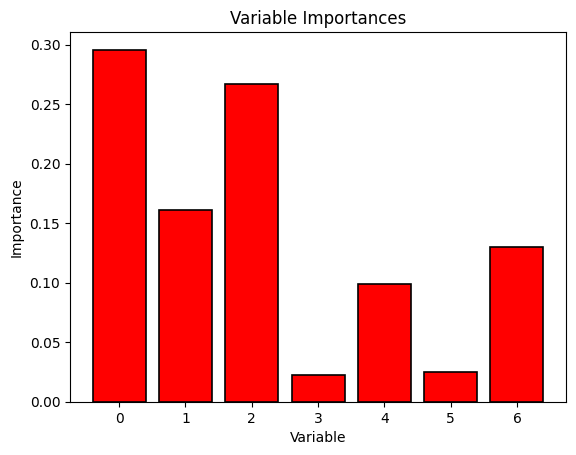

In [315]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

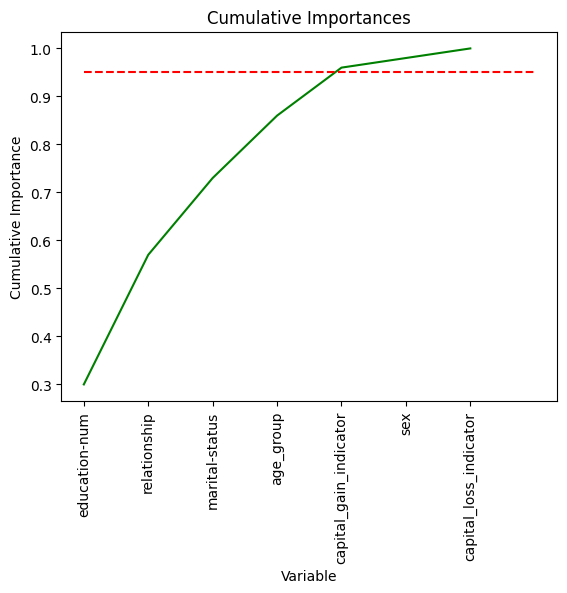

In [316]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [317]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 5
